In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
file_path = 'C:\\Users\\aamir\\Documents\\DATA SCIENCE\\.spyder-py3\\working practice\\Fraud_Check.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

In [6]:
data['Taxable.Income'] = data['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')


In [7]:
le = LabelEncoder()
data['Undergrad'] = le.fit_transform(data['Undergrad'])
data['Marital.Status'] = le.fit_transform(data['Marital.Status'])
data['Urban'] = le.fit_transform(data['Urban'])


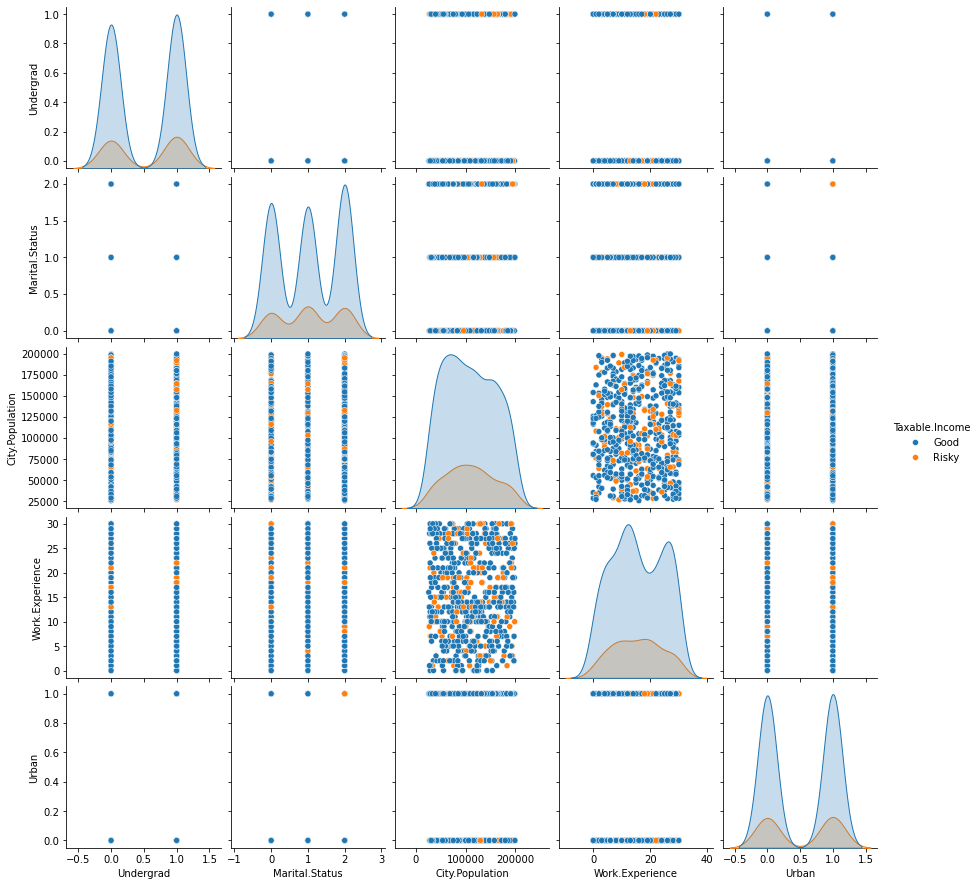

In [8]:
sns.pairplot(data, hue='Taxable.Income', diag_kind='kde')
plt.show()

# Train-Test Split
X = data.drop('Taxable.Income', axis=1)
y = data['Taxable.Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)


In [10]:
print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Decision Tree Results:
Accuracy: 0.6666666666666666
Confusion Matrix:
 [[74 20]
 [20  6]]
Classification Report:
               precision    recall  f1-score   support

        Good       0.79      0.79      0.79        94
       Risky       0.23      0.23      0.23        26

    accuracy                           0.67       120
   macro avg       0.51      0.51      0.51       120
weighted avg       0.67      0.67      0.67       120



In [11]:
# Hyperparameter Tuning for Decision Tree
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_dt_classifier = grid_search.best_estimator_


In [12]:
y_pred_tuned = best_dt_classifier.predict(X_test)

print("\nTuned Decision Tree Results:")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))



Tuned Decision Tree Results:
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.7833333333333333
Confusion Matrix:
 [[94  0]
 [26  0]]
Classification Report:
               precision    recall  f1-score   support

        Good       0.78      1.00      0.88        94
       Risky       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
# Ensemble Techniques: Bagging Classifier
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                                       n_estimators=50, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_test)


In [14]:
print("\nBagging Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bagging))
print("Classification Report:\n", classification_report(y_test, y_pred_bagging))



Bagging Classifier Results:
Accuracy: 0.7666666666666667
Confusion Matrix:
 [[90  4]
 [24  2]]
Classification Report:
               precision    recall  f1-score   support

        Good       0.79      0.96      0.87        94
       Risky       0.33      0.08      0.12        26

    accuracy                           0.77       120
   macro avg       0.56      0.52      0.50       120
weighted avg       0.69      0.77      0.70       120



In [15]:
# Ensemble Techniques: AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                                         n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)
y_pred_adaboost = adaboost_classifier.predict(X_test)


In [16]:
print("\nAdaBoost Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adaboost))
print("Classification Report:\n", classification_report(y_test, y_pred_adaboost))


AdaBoost Classifier Results:
Accuracy: 0.6833333333333333
Confusion Matrix:
 [[76 18]
 [20  6]]
Classification Report:
               precision    recall  f1-score   support

        Good       0.79      0.81      0.80        94
       Risky       0.25      0.23      0.24        26

    accuracy                           0.68       120
   macro avg       0.52      0.52      0.52       120
weighted avg       0.67      0.68      0.68       120

